In [1]:
# check out list words and the apostrophe situation in the step for loop
# check out allowing more than maxseqlen in generate text
# look into batch size
#text generation apostrpphe breaking

In [122]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.oauth2 import service_account
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='/Users/Eis4Elephant/Desktop/key.json'

client = language.LanguageServiceClient()

In [333]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


# Load Tweet Data

In [334]:
all_tweet_data=pd.read_csv('../Load_Tweets/data/Full Trump Archive.csv')
all_tweet_data=all_tweet_data.drop(['Unnamed: 0'], axis=1)

In [335]:
Obama_tweets=pd.read_csv('../Load_Tweets/data/Obama_tweets.csv')
Obama_tweets=Obama_tweets.drop(['Unnamed: 0', 'ID', 'has_media', 'is_retweet', 'nbr_favorite', 'nbr_reply', 'nbr_retweet', 'url', 'user_id', 'medias', 'is_reply', 'usernameTweet'], axis=1 )

In [336]:
trump_tweet_text_all = all_tweet_data['text'].str.cat(sep=' ')

In [337]:
obama_tweet_text_all= Obama_tweets['text'].str.cat(sep=' ')

# Clean tweets

In [338]:
# import re
# obama_tweet_text_all=re.sub('http://\S*', '', obama_tweet_text_all)
# obama_tweet_text_all=re.sub('https://\S*', '', obama_tweet_text_all)
# obama_tweet_text_all=re.sub('.com/\S*', '', obama_tweet_text_all)
# obama_tweet_text_all=re.sub('(\.{1,10})(\w)', ' \\1 \\2',obama_tweet_text_all) #...fdj ... fdj
# # obama_tweet_text_all=re.sub('(\w)(\.)', '\\1 \\2',obama_tweet_text_all) #...fdj ... fdj



In [339]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
obama_words=tokenizer.tokenize(obama_tweet_text_all)

In [340]:
obama_words=pd.Series(obama_words)

In [341]:
tweet_text_cleaned_o = pd.Series(obama_words).str.cat(sep=' ')

In [342]:
# #remove common words
# words_to_remove=['the', 'to', 'a', 'of', 'in','at', 'this', 'our', 'that', 'with', 'and', 'for', 'on', 'is', 'pic.twitter', 'you', 'your']
# for word in words_to_remove:
#     listofobamawords=listofobamawords[listofobamawords!=word]

In [343]:
#download if you don't already have 

# nltk.download('punkt')
# nltk.download('brown')
# nltk.download('averaged_perceptron_tagger')

# Isolate desired word type

In [344]:
from textblob import TextBlob
import nltk
blob = TextBlob(tweet_text_cleaned_o)
# print(blob.noun_phrases)
parts_of_speech=blob.tags

In [345]:
#print noun phrases

# blob2 = TextBlob(obama_text_all[1000:2000])
# print(blob2.noun_phrases)


In [346]:
#some words are lost in tokenization
#visualize value counts of POS

len(set(listofobamawords))
len(parts_of_speech)
pd.Series(blob.split()).value_counts().head()

the          9007
http         7946
to           7787
President    4941
OFA          4460
dtype: int64

In [352]:
pos_O=dict(parts_of_speech)
Oadjectives=[]
for word in obama_words:
    if word in pos_O.keys():
        if pos_O[word]=='JJ' or pos_O[word]=='JJR' or pos_O[word]=='JJS':
#         if pos[word]=='NN' or pos[word]=='NNS' or pos[word]=='NNP' or pos[word]=='NNPS':
            Oadjectives.append(word)

# Analyze top words

## Obama

In [353]:
#find most used words
top_words=obama_words.value_counts()
top_words=top_words[top_words>10]

In [354]:
#remove all non adj words
for word in top_words.index:
    if word not in Oadjectives:
        top_words=top_words.drop(word)

In [355]:
# #clean non adj that snuck in
# top_words=top_words.drop(['—President', 'wh.gov/live', 'go', ])

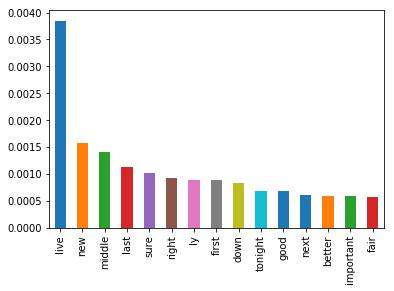

In [356]:
top_words_percent= top_words/len(obama_words)
# top_words.head(15).plot.bar()
top_words_percent=top_words/len(obama_words)
top_words_percent.head(15).plot.bar()

## Trump

In [357]:
#so that text is visble when displaying df 
pd.options.display.max_colwidth=1000
#clean tweet text
# trump_tweet_text_all=re.sub(' (\.{1,10})(\w)', ' \\1 \\2',obama_tweet_text_all) #...fdj ... fdj


# listofwords=pd.Series(trump_tweet_text_all.split())
# listofwords=listofwords[listofwords !='[URL]']
# listofwords=listofwords[listofwords !='&amp;']

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

trump_words=tokenizer.tokenize(trump_tweet_text_all)
tweet_text_cleaned = pd.Series(test).str.cat(sep=' ')

In [358]:
trump_words=pd.Series(trump_words)

In [359]:
# pos=nltk.pos_tag(test[0:200000])

In [360]:
blob = TextBlob(tweet_text_cleaned)
# print(blob.noun_phrases)
parts_of_speech_T=blob.tags

In [361]:
pos_T=dict(parts_of_speech)
Tadjectives=[]
for word in trump_words:
    if word in pos_T.keys():
        if pos_T[word]=='JJ' or pos_T[word]=='JJR' or pos_T[word]=='JJS':
#         if pos[word]=='NN' or pos[word]=='NNS' or pos[word]=='NNP' or pos[word]=='NNPS':
            Tadjectives.append(word)

top_words_T=trump_words.value_counts()
top_words_T=top_words_T[top_words_T>10]


In [362]:
for word in top_words_T.index:
    if word not in Tadjectives:
        top_words_T=top_words_T.drop(word)

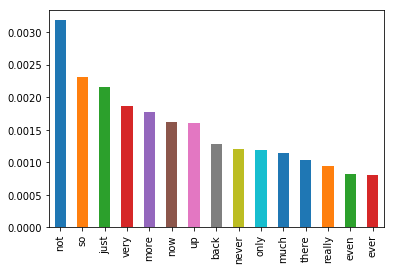

In [363]:
# top_words_T.head(15).plot.bar()
top_words_T_percent= top_words_T/len(trump_words)
top_words_T_percent.head(15).plot.bar()

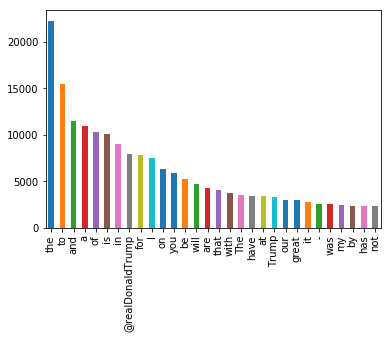

In [42]:
listofwords=pd.Series(listofwords)
top_words=listofwords.value_counts()
top_words_percent= top_words/len(listofwords)
top_words.head(30).plot.bar()
# top_words.head(50)

In [43]:
cleaned_text=listofwords.str.cat(sep=' ')
selected=top_words[50:600]
testin=selected.to_dict(dict)
type(testin)

dict

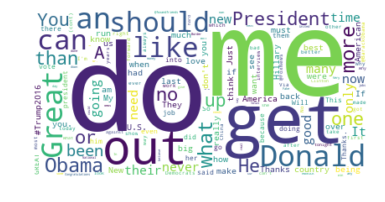

In [44]:
# Create and generate a word cloud image:
# wordcloud = WordCloud().generate(cleaned_text)
wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(testin)
# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [45]:
trump_mask = np.array(Image.open('../Load_Tweets/Trump_Transparent.png'))

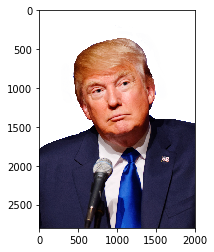

In [46]:
plt.imshow(trump_mask)

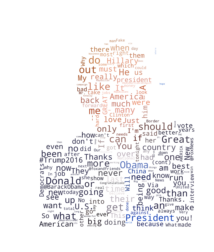

In [47]:
wc = WordCloud(background_color="white", mask=trump_mask,
               max_font_size=130, random_state=42)
wc.generate_from_frequencies(testin)

# create coloring from image
image_colors = ImageColorGenerator(trump_mask)

# show
# fig, axes = plt.subplots(1,2 )
# # recolor wordcloud and show
# # we could also give color_func=image_colors directly in the constructor
# axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# axes[1].imshow(trump_mask, cmap=plt.cm.gray, interpolation="bilinear")
# for ax in axes:
#     ax.set_axis_off()
# plt.show()

plt.figure(figsize=[4,4])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [48]:
import re
caps=[]
for word in listofwords:
    caps.append([i[0] for i in re.findall('(([A-Z])(?![a-z]))', word)])
newlist=[]
for lists in caps:
    if lists!=[]:
        newlist.append(lists)
strings=[]
for lists in newlist:
    strings.append(''.join(lists))

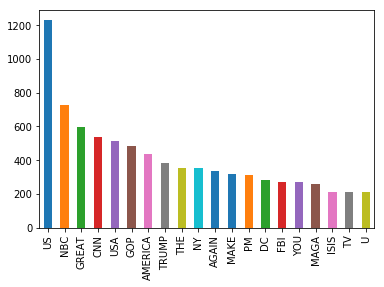

In [55]:
strings=pd.Series(strings)
top_cap_words=strings.value_counts()
top_cap_words=top_cap_words.drop(['I', 'RT', 'A', 'J', 'T', 'B', 'M', 'D', 'R', 'O'])
top_cap_words.head(20).plot.bar()

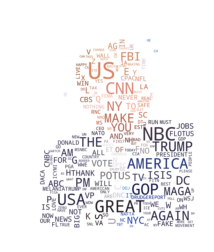

In [56]:
wc = WordCloud(background_color="white", mask=trump_mask,
               max_font_size=300, random_state=42)
wc.generate_from_frequencies(top_cap_words[:300])

# create coloring from image
image_colors = ImageColorGenerator(trump_mask)


plt.figure(figsize=[4,4])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()


In [12]:
tweet_text.head()

0          PAY TO PLAY POLITICS. #CrookedHillary [URL]
1    Very little pick-up by the dishonest media of ...
2    Crooked Hillary Clinton likes to talk about th...
3    Thank you Florida- a MOVEMENT that has never b...
4    Join me Thursday in Florida &amp; Ohio!West Pa...
Name: TEXT, dtype: object

In [17]:
total_chars=len(tweet_text_all)
total_chars
total_wordz=len((tweet_text_all.split()))
total_wordz

250988

In [13]:
chars = set(tweet_text_all)
words = set(tweet_text_all.split())
print ("total number of unique words", len(words))
print ("total number of unique chars", len(chars))

total number of unique words 32293
total number of unique chars 369


In [14]:
words=list(words)

In [15]:
#replace apostrophes in dictionary keys 
for i in range (len(words)):
    words[i]=words[i].replace("‘", '').replace("’", '').replace("'", '')